#필요한 라이브러리

In [ ]:
# 필요한 라이브러리 설치; pip install 라이브러리들(numpy, pandas)
# local인 jupyter notebook에서는 'pip install 라이브러리들'로 가능.
# remote인 colab에서는 '!pip install 라이브러리들' <- '!'를 해줘야함.
# 참고로 anaconda가 설치된 jupyter notebook에서는 'conda install 라이브러리들'로 설치가 가능함.
# 더 알고싶은 경우에 특강 System Settings 참고
# https://dsl-2v55025.slack.com/archives/C04H8A2NFAA

!pip install numpy pandas sklearn matplotlib statsmodels seaborn

In [ ]:
# 기본적인 라이브러리(기초세션에서 다룸)
import os
import time
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# 구글 드라이브 연동
from google.colab import drive
drive.mount('/content/drive')

## Package: 사이킷 런(scikit-learn)

| 모듈 | 설명 |
|:----:|:----:|
| `sklearn.datasets` | 내장된 예제 데이터 세트 |
| `sklearn.preprocessing` | 다양한 데이터 전처리 기능 제공 (변환, 정규화, 스케일링 등) |
| `sklearn.feature_selection` | 특징(feature)를 선택할 수 있는 기능 제공 | 
| `sklearn.feature_extraction` | 특징(feature) 추출에 사용 |
| `sklearn.decomposition` | 차원 축소 관련 알고리즘 지원 (PCA, NMF, Truncated SVD 등)
| `sklearn.model_selection` | 교차 검증을 위해 데이터를 학습/테스트용으로 분리, 최적 파라미터를 추출하는 API 제공 (GridSearch 등)
| `sklearn.metrics` | 분류, 회귀, 클러스터링, Pairwise에 대한 다양한 성능 측정 방법 제공 (Accuracy, Precision, Recall, ROC-AUC, RMSE 등) |
| `sklearn.pipeline` | 특징 처리 등의 변환과 ML 알고리즘 학습, 예측 등을 묶어서 실행할 수 있는 유틸리티 제공 |
| `sklearn.linear_model` | 선형 회귀, 릿지(Ridge), 라쏘(Lasso), 로지스틱 회귀 등 회귀 관련 알고리즘과 SGD(Stochastic Gradient Descent) 알고리즘 제공 |
| `sklearn.svm` | 서포트 벡터 머신 알고리즘 제공 |
| `sklearn.neighbors` | 최근접 이웃 알고리즘 제공 (k-NN 등)
| `sklearn.naive_bayes` | 나이브 베이즈 알고리즘 제공 (가우시안 NB, 다항 분포 NB 등) |
| `sklearn.tree` | 의사 결정 트리 알고리즘 제공 |
| `sklearn.ensemble` | 앙상블 알고리즘 제공 (Random Forest, AdaBoost, GradientBoost 등) |
| `sklearn.cluster` | 비지도 클러스터링 알고리즘 제공 (k-Means, 계층형 클러스터링, DBSCAN 등)

# 실습 1) Multiple Linear_Regression

## 데이터 불러오기

**필독)** Boston_house 데이터를 업로드 해주시고, 아래의 path에 알맞은 경로를 넣어주세요!

In [ ]:
#Boston_house.csv 데이터 불러오기
path = '/content/drive/MyDrive/DSL/Boston_house.csv'
boston = pd.read_csv(path)
boston

In [ ]:
#아주 간단하게 데이터를 살펴보자.
#14개의 컬럼, 506의 로우로 구성
#결측치 없음
boston.info()

**TASK**

y: Target 열 <br>
x: 나머지 열들

'간단한' 다중선형회귀모델을 만들자!

* 레이블(Target열) 존재 -> supervised model 적용
* Target열은 연속형 자료 -> regression model 적용



1) X와 Y간 상관성 > 높을 수록 좋음: X가 Y를 잘 설명한다는 것 <br>
(Xi가 Y를 잘 설명하지 못하는 경우, 불필요한 변수이므로 버리는 것이 좋음.
모델이 쓸데없이 복잡해짐, 과적합 위험)


2) X1와 X2간 상관성 > 낮을 수록 좋음. <br>
(입력변수 간 상관관계가 높다면 다중공선성 문제)


## 독립변수와 종속변수 간 상관성

In [ ]:
#pandas의 corr(): 상관계수 행렬
boston.corr()

In [ ]:
#pandas의 corr() 함수: 상관계수 행렬
boston.corr()["Target"] #Target 열만 보자!

결과를 보면, 모든 컬럼들이 어느 정도 Y에 대한 설명력을 갖추었다고 판단할 수 있다.

<br> 또한 이제부터 X, Y 데이터를 따로 다루면서 작업할 것이므로 X, Y 데이터를 분리시켜보자: raw_X, raw_y 각각에 X, Y 데이터를 담는다!

In [ ]:
# raw_X에 X 데이터만 담는다.
raw_X = boston.drop(['Target'], axis=1)
raw_X

In [ ]:
#raw_X의 컬럼 확인
raw_X.columns

In [ ]:
#raw_y
raw_y = boston['Target']
raw_y

## 독립변수 간 상관성

### 상관계수와 산점도 행렬을 통해 다중공선성 확인

In [ ]:
#pandas의 corr() 함수: 상관계수 행렬
raw_X.corr()

In [ ]:
# seaborn의 heatmap() 함수: 히트맵 그리기
# 색깔이 어두운 칸: 양의 상관관계가 높다
# 색깔이 밝은 칸: 음의 상관관계가 높다
# 색깔이 매우 어둡거나 밝은 칸에 주의!
cmap = sns.light_palette(color="black", as_cmap=True)
sns.heatmap(raw_X.corr(), annot=True, cmap=cmap, annot_kws={"size": 7})
plt.show()

In [ ]:
# seaborn의 pairplot()함수: 산점도 행렬 (대각선에는 히스토그램을 그려줌)
# y=x 혹은 y=-x의 형태에 가까울수록 상관관계가 높다.
sns.pairplot(raw_X)
plt.show()

### VIF를 통한 다중공선성 확인


In [ ]:
# 전체 독립변수(raw_X)에 대한 VIF값 구하기
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame() #vif라는 빈 데이터 프레임을 만들어준다
vif["features"] = raw_X.columns # 독립변수들의 이름들로 구성된 features열 추가
vif["VIF Factor"] = [variance_inflation_factor(raw_X.values, i) for i in range(raw_X.shape[1])] # 리스트내포, raw_X.shape[1] = 13
vif

In [ ]:
# 다중공선성이 가장 높은 PTRATIO 컬럼 삭제
X_1 = raw_X.drop(["PTRATIO"], axis = 1)

# 다중공선성 재측정
vif = pd.DataFrame()
vif["features"] = X_1.columns
vif["VIF Factor"] = [variance_inflation_factor(X_1.values, i) for i in range(X_1.shape[1])]
vif

In [ ]:
# 다중공선성이 가장 높은 NOX 컬럼 삭제
X_2 = X_1.drop(["NOX"], axis = 1)

# 다중공선성 재측정
vif = pd.DataFrame()
vif["features"] = X_2.columns
vif["VIF Factor"] = [variance_inflation_factor(X_2.values, i) for i in range(X_2.shape[1])]
vif

In [ ]:
# 다중공선성이 가장 높은 TAX 컬럼 삭제
X_3 = X_2.drop(["TAX"], axis = 1)

# 다중공선성 재측정
vif = pd.DataFrame()
vif["features"] = X_3.columns
vif["VIF Factor"] = [variance_inflation_factor(X_3.values, i) for i in range(X_3.shape[1])]
vif

In [ ]:
# 다중공선성이 가장 높은 RM 컬럼 삭제
X_4 = X_3.drop(["RM"], axis = 1)

# 다중공선성 재측정
vif = pd.DataFrame()
vif["features"] = X_4.columns
vif["VIF Factor"] = [variance_inflation_factor(X_4.values, i) for i in range(X_4.shape[1])]
vif

In [ ]:
# 다중공선성이 가장 높은 AGE 컬럼 삭제
X_5 = X_4.drop(["AGE"], axis = 1)

# 다중공선성 재측정
vif = pd.DataFrame()
vif["features"] = X_5.columns
vif["VIF Factor"] = [variance_inflation_factor(X_5.values, i) for i in range(X_5.shape[1])]
vif

이제 다중공선성 문제가 어느 정도 해결된 것 같으니, 해당 컬럼들로 다중선형회귀 모델을 만들자!

## 훈련 세트와 테스트 세트로 데이터 분리

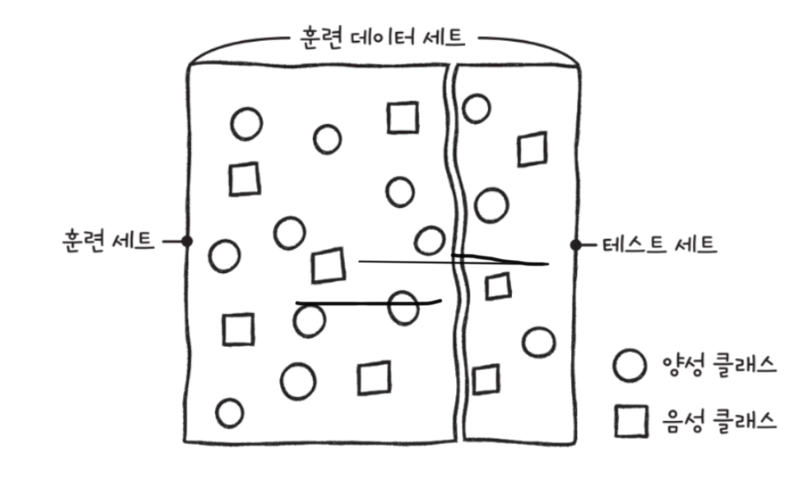

데이터셋을 훈련세트와 테스트 세트로 나누는 것은 사이킷런 패키지의 train_test_split 함수로 쉽게 구현할 수 있다.

sklearn.model_selection.train_test_split(*arrays, test_size=None, train_size=None, random_state=None, shuffle=True, stratify=None)

훈련 세트: 모델 학습 / 훈련시키기 위한 데이터셋 <br>
테스트 세트: 모델의 성능을 평가하기 위한 데이터셋으로, **절대** 모델 훈련 과정에 관여해서는 안 된다.

In [ ]:
#sklearn 패키지의 model_selection 모듈에서 train_test_split 함수를 갖고 오겠다
from sklearn.model_selection import train_test_split 

train_X, test_X, train_y, test_y = train_test_split(X_5, raw_y, 
                                                    train_size=0.7, #훈련 세트 사이즈: 0.7
                                                    test_size=0.3, #테스트 세트 사이즈: 0.3
                                                    random_state=1) #랜덤 시드 설정

In [ ]:
train_X[:5]

In [ ]:
#shape 확인
print(train_X.shape, test_X.shape, train_y.shape, test_y.shape)

## 스케일링

독립변수들 간 스케일을 맞춰주는 작업 > 회귀계수 해석에 도움 <br>
종속변수인 Y에 대해서는 스케일링 할 필요 없음 <br>
여기서는 StandardScaler를 사용하겠다!

In [ ]:
#sklearn 패키지 preprocessing 모듈에서 StandardScaler 가져오기
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler() #빈 스케일러 생성
scaler = scaler.fit(train_X) #이후 이 스케일러를 train_X에 맞는 스케일러로 만들어준다.
#주의) fit할 때는 무조건 train_X로 스케일러를 만들어줘야한다. 테스트 세트는 모델 구현에 일절 관여해선 안 됨!

train_X_scaled = scaler.transform(train_X) #train_X 데이터 변환
test_X_scaled = scaler.transform(test_X) #test_X 데이터 변환
print(test_X_scaled[:5])

In [ ]:
# 참고로 여기서 train_X_scaled, test_X_scaled의 타입은 2차원 어레이가 된다
print(type(train_X)) #원래는 데이터프레임
print(type(train_X_scaled)) #2차원 어레이가 됐다

## Linear Regression model 만들기

fit(X, Y): 모델 훈련을 위한 함수 <br>
predict(X): 예측을 위한 함수

In [ ]:
#sklearn 패키지 linear_model 모듈에서 LinearRegression 가져오기
from sklearn.linear_model import LinearRegression

linear_model = LinearRegression().fit(train_X_scaled, train_y) #Linear Regression model 생성

In [ ]:
#회귀계수와 절편을 확인해보자!
print(linear_model.coef_) #회귀계수
print(linear_model.intercept_) #절편

In [ ]:
#위의 결과값을 보기 좋게 출력해보자!
linear_beta = linear_model.coef_
linear_intercept = linear_model.intercept_

for i in range(len(linear_beta)):
  print(f"{train_X.columns[i]} : {linear_beta[i]: .2f}")
print(f"Intercept(Beta0) :{linear_intercept: .2f}")

In [ ]:
#train_X 데이터 15개 예측
linear_model.predict(train_X_scaled)[:15]

## 성능평가 : MSE, R2

**MSE**

sklearn.metrics.mean_squared_error(y_true, y_pred)

**R2**

sklearn.metrics.r2_score(y_true, y_pred)

In [ ]:
#사이킷런 패키지 metrics 모듈에서 r2_score, mean_squared_error 함수 가져오기
from sklearn.metrics import r2_score, mean_squared_error # R^2, MSE

In [ ]:
r2_score(train_y, linear_model.predict(train_X_scaled)) #r2_score(실제값, 예측값)

In [ ]:
mean_squared_error(train_y, linear_model.predict(train_X_scaled)) #mean_squared_error(실제값, 예측값)

In [ ]:
#R2, MSE 값으로 평가 (train set에 대해) - 보기 좋게 출력
print("R2 for multiple linear regression model : {:.2f}".format(r2_score(train_y, linear_model.predict(train_X_scaled))))
print("MSE for multiple linear regression model : {:.2f}".format(mean_squared_error(train_y, linear_model.predict(train_X_scaled))))

In [ ]:
#R2, MSE 값으로 평가 (test_data에 대해) - 보기 좋게 출력
print("R2 for multiple linear regression model : {:.2f}".format(r2_score(test_y, linear_model.predict(test_X_scaled))))
print("MSE for multiple linear regression model : {:.2f}".format(mean_squared_error(test_y, linear_model.predict(test_X_scaled))))

#실습 2) Ridge & Lasso

## 데이터 분리, 스케일링

릿지와 라쏘의 경우 의미 없는 변수를 알아서 0으로 (또는 0에 가깝게) 만들어 준다! <br> 회귀계수에 관한 규제항을 추가한, 다중공선성에 강한 회귀 모델이다.

In [ ]:
#훈련 세트와 테스트 세트로 나누어주기
#위에서 봤던 train_X , ... 등은 새롭게 덮어씌워졌을 것이다!
from sklearn.model_selection import train_test_split
train_X, test_X, train_y, test_y = train_test_split(raw_X, raw_y, train_size=0.7, test_size=0.3, random_state=1)
print(train_X.shape, test_X.shape, train_y.shape, test_y.shape)

In [ ]:
train_X[:5]

In [ ]:
#sklearn 패키지 preprocessing 모듈에서 StandardScaler 가져오기
from sklearn.preprocessing import StandardScaler

scaler2 = StandardScaler() #빈 스케일러 생성
scaler2 = scaler.fit(train_X) #위 스케일러를 새로운 train_X에 맞는 스케일러로 만들어준다
#주의) fit할 때는 무조건 train_X로 스케일러를 만들어줘야한다. 테스트 세트는 모델 구현에 일절 관여해선 안 됨!

train_X_scaled = scaler2.transform(train_X) #train_X 데이터를 변환
test_X_scaled = scaler2.transform(test_X) #test_X 데이터를 변환
print(test_X_scaled[:5])

In [ ]:
# 참고로 여기서 train_X_scaled, test_X_scaled의 타입은 2차원 어레이이다.
# 스케일링 적용 결괏값은 2차원 어레이로 변환된다.
print(type(train_X)) #원래는 데이터프레임
print(type(train_X_scaled)) #2차원 어레이가 됐다

## Ridge, Lasso model 만들기

In [ ]:
#sklearn 패키지 linear_model 모듈에서 Ridge, Lasso 가져오기
from sklearn.linear_model import Ridge, Lasso

ridge = Ridge(alpha=1.0).fit(train_X_scaled, train_y) #Ridge 모델 생성
lasso = Lasso(alpha=1.0).fit(train_X_scaled, train_y) #Lasso 모델 생성
#알파는 하이퍼 파라미터! 알파값이 커질 수록 규제가 강해진다

In [ ]:
# Ridge: 규제항이 회귀계수의 제곱합이므로 회귀계수들이 딱 0이 되지는 않고, 0에 가까워진다.
print(ridge.coef_)
print(ridge.intercept_)

In [ ]:
#위의 결과값을 보기 좋게 출력해보자!
ridge_beta = ridge.coef_
ridge_intercept = ridge.intercept_

for i in range(len(ridge_beta)):
  print(f"{train_X.columns[i]} : {ridge_beta[i]: .2f}")
print(f"Intercept(Beta0) :{ridge_intercept: .2f}")

In [ ]:
# Lasso: 규제항이 회귀계수의 절댓값 합이므로 회귀계수들이 0에 수렴한다.
print(lasso.coef_)
print(lasso.intercept_)

In [ ]:
#위의 결과값을 보기 좋게 출력해보자!
lasso_beta = lasso.coef_
lasso_intercept = lasso.intercept_

for i in range(len(lasso_beta)):
  print(f"{train_X.columns[i]} : {lasso_beta[i]: .2f}")
print(f"Intercept(Beta0) :{lasso_intercept: .2f}")

## 성능평가

In [ ]:
from sklearn.metrics import r2_score, mean_squared_error # R^2, MSE

In [ ]:
# MSE; mean_squared_error
print("MSE for Ridge model : {:.2f}".format(mean_squared_error(test_y, ridge.predict(test_X_scaled))))
print("MSE for Lasso model : {:.2f}".format(mean_squared_error(test_y, lasso.predict(test_X_scaled))))

In [ ]:
# R2; r2_score
print("R2 score for Ridge model : {:.2f}".format(r2_score(test_y, ridge.predict(test_X_scaled))))
print("R2 score for Lasso model : {:.2f}".format(r2_score(test_y, lasso.predict(test_X_scaled))))

위 결과로 보았을 때, 릿지는 성능이 우수한 반면, 라쏘는 비교적 성능이 좋지 못하다. <br> 라쏘는 하이퍼 파라미터인 알파값에 매우 민감하다. (어쩌면 이 하이퍼 파라미터를 잘 조정해주면 성능이 좋아지지 않을까?) <br>하이퍼 파라미터인 알파 값을 조정해서 다시 한번 이 둘을 비교해보자.

In [ ]:
from sklearn.linear_model import Ridge, Lasso

ridge_small_alpha = Ridge(alpha=0.05).fit(train_X_scaled, train_y) #알파값이 작은 Ridge 모델 생성
lasso_small_alpha = Lasso(alpha=0.05).fit(train_X_scaled, train_y) #알파값이 작은 Ridge 모델 생성

In [ ]:
#릿지 모델의 회귀계수 (보기 좋게 출력)
ridge_beta = ridge_small_alpha.coef_
ridge_intercept = ridge_small_alpha.intercept_

for i in range(len(ridge_beta)):
  print(f"{train_X.columns[i]} : {ridge_beta[i]: .2f}")
print(f"Intercept(Beta0) :{ridge_intercept: .2f}")

In [ ]:
#라쏘 모델의 회귀계수 (보기 좋게 출력)
lasso_beta = lasso_small_alpha.coef_
lasso_intercept = lasso_small_alpha.intercept_

for i in range(len(lasso_beta)):
  print(f"{train_X.columns[i]} : {lasso_beta[i]: .2f}")
print(f"Intercept(Beta0) :{lasso_intercept: .2f}")

In [ ]:
# MSE; mean_squared_error(실제값, 예측값)
print("MSE for Ridge model : {:.2f}".format(mean_squared_error(test_y, ridge_small_alpha.predict(test_X_scaled))))
print("MSE for Lasso model : {:.2f}".format(mean_squared_error(test_y, lasso_small_alpha.predict(test_X_scaled))))

In [ ]:
#R2; r2_score(실제값, 예측값)
print("R square score for Ridge model : {:.2f}".format(r2_score(test_y, ridge_small_alpha.predict(test_X_scaled))))
print("R square score for Lasso model : {:.2f}".format(r2_score(test_y, lasso_small_alpha.predict(test_X_scaled))))

하이퍼 파라미터를 조정해주니 라쏘의 성능이 크게 오른 것을 확인할 수 있다.

# 실습 3) Logistic Regression

## 분류 문제 만들기

위 데이터에서 기존의 Target 열을 0과 1(이산적 수치)로 변형함으로써, <br> 회귀문제를 분류문제로 바꾸어보자. <br>
(참고로 이산적 수치로 변형하지 않고 분류 알고리즘을 적용하려고 하면 오류가 뜬다)

Remind) <br>
회귀 > 연속적 수치 예측 <br>
분류 > 이산적 수치 예측

In [ ]:
#일단 train_y / test_y의 복사본을 만들고, 그것의 이름을 train_y_forlog, test_y_log라고 하자
#copy(): 복사본 만드는 함수
train_y_forlog = train_y.copy()
test_y_forlog = test_y.copy()

In [ ]:
#복사본
train_y_forlog[:5]

In [ ]:
#훈련 세트에서 20보다 큰 데이터를 1로, 작거나 같은 데이터를 0으로 바꿔준다.
train_y_forlog[train_y <= 20] = 0
train_y_forlog[train_y > 20] = 1

#테스트 세트에서 20보다 큰 데이터를 1로, 작거나 같은 데이터를 0으로 바꿔준다.
test_y_forlog[test_y <= 20] = 0
test_y_forlog[test_y > 20] = 1

In [ ]:
#1과 0의 개수가 얼추 비슷하다
print(len(train_y_forlog[train_y_forlog == 1])) #1의 개수
print(len(train_y_forlog[train_y_forlog == 0])) #0의 개수

이제 0과 1을 구분하는 로지스틱 알고리즘을 만들어보자!

## Logistic Regression model 만들기

In [ ]:
#사이킷런 패키지 linear_model모듈에서 Logistic Regression 함수 갖고 오기
from sklearn.linear_model import LogisticRegression

LogisticRegression = LogisticRegression()
LogisticRegression.fit(train_X_scaled, train_y_forlog)

## 성능평가

In [ ]:
# 평가; 정확도, F1_score
from sklearn.metrics import accuracy_score, f1_score
print('Accuracy for test dat: {:.3f}'.format(accuracy_score(test_y_forlog,LogisticRegression.predict(test_X_scaled))))
print('F1 score for test dat: {:.3f}'.format(f1_score(test_y_forlog,LogisticRegression.predict(test_X_scaled))))

분류 성능평가지표: 정확도, 정밀도, 재현율, F1 score

1. Accuracy(정확도) : (TP + TN) / (TP + FP + TN + FN)
> 올바르게 예측된 것의 비율

2. 정밀도(Precission): TP / FP + TP
> 모델이 True라고 분류한 것 중에서 실제 True인 것의 비율

3. 재현율(Recall): TP / FN + TP
> 실제 True인 것 중에서 모델이 True라고 예측한 것의 비율

4. F1 score = 2 / ((1/재현율) +(1/정밀도))
> 정밀도와 재현율의 조화평균

<br> 위의 4가지 지표 모두 0 ~ 1값을 가지며 1에 가까울 수록 좋음

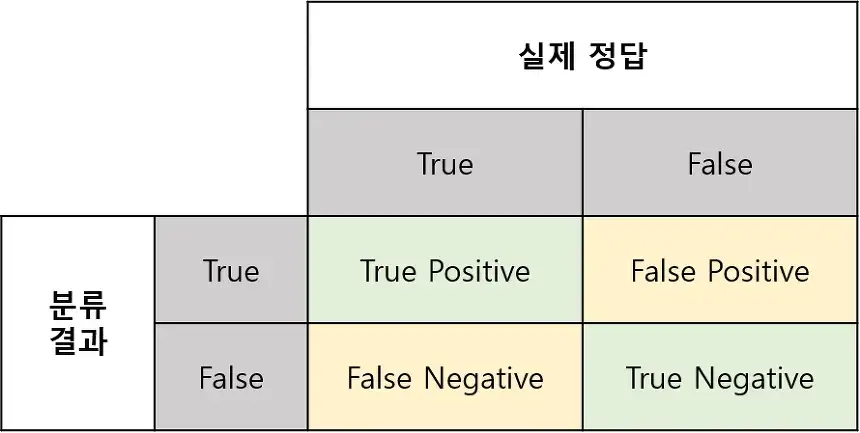

# 실습 4) SVM

##선형 SVM

In [ ]:
#사이킷런 내장 데이터인 유방암 데이터를 사용해보자!
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()

In [ ]:
cancer

In [ ]:
#데이터(독립변수들)
cancer.data[:2]

In [ ]:
#데이터(종속변수)
cancer.target[15:25]

In [ ]:
#data 컬럼명에 해당하는 정보를 볼 수 있음
cancer.feature_names

In [ ]:
#cancer.data를 데이터로 갖고, cancer.feature_names를 열로 갖는 데이터 프레임을 만들자. 그것의 이름을 cancer_df라고 하자.
cancer_df = pd.DataFrame(data = cancer.data, columns = cancer.feature_names)

#cancer_df에 target열을 추가해주자
#사이킷런 내장 데이터셋은 종속변수가 이렇게 ~.target형식으로 따로 구분되어 있다.
cancer_df['target'] = cancer.target

cancer_df

In [ ]:
#간단하게 이 데이터프레임을 살펴보자
cancer_df.info()

TASK:

나머지 열들로 Target열을 분류하는 SVM을 실습해보자! <br>
SVM 역시 스케일링에 민감한 분석방법이므로, 스케일링을 먼저 진행한다.

### 데이터 분리, 스케일링

In [ ]:
raw_X = cancer_df.iloc[:, :-1] #마지막 컬럼을 제외한 나머지 컬럼을 raw_X에 넣는다
raw_y = cancer_df.iloc[:, -1] #마지막 컬럼만 raw_y에 넣는다

In [ ]:
#raw_X 확인해보기
raw_X[:5]

In [ ]:
#raw_X, raw_y를 훈련세트와 테스트 세트로 나누어주자
from sklearn.model_selection import train_test_split
train_X, test_X, train_y, test_y = train_test_split(raw_X, raw_y, test_size = 0.3, random_state = 1) 

In [ ]:
#train_X 확인해보기
train_X[:5]

In [ ]:
#sklearn 패키지 preprocessing 모듈에서 StandardScaler 가져오기
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()#빈 스케일러 생성
train_X_scaled = scaler.fit_transform(train_X) #fit_transform 함수는 아래의 두 과정을 동시에 진행 
#scaler.fit(train_X)
#train_X_scaled = scaler.transform(train_X)
#주의) fit할 때는 무조건 train_X로 스케일러를 만들어줘야한다. 테스트 세트는 모델 구현에 일절 관여해선 안 됨!

test_X_scaled = scaler.transform(test_X) #test_X 데이터를 scaler로 스케일링

In [ ]:
test_X_scaled[:2]

### Linear SVM model 만들기

In [ ]:
#sklearn svm 모듈에서 SVC 함수를 가져온다.
from sklearn.svm import SVC

#선형 SVM 모델을 담기 위한 객체 생성
linear_svm = SVC(kernel = "linear", C = 0.1)
#kernel = "linear" : 선형 SVM 적용, C는 하이퍼 파라미터 (C가 작을 수록 오분류에 관대, but 마진은 더 커짐)

#SVM 모델 훈련
linear_svm.fit(train_X_scaled, train_y)

In [ ]:
#우리가 구하고자 하는 초평면의 계수 값
linear_svm.coef_

In [ ]:
#예측값 (10개만)
linear_svm.predict(test_X_scaled[:10])

In [ ]:
#실제값 (10개만)
test_y[:10]

In [ ]:
# 평가; 정확도, F1_score
from sklearn.metrics import accuracy_score, f1_score
print('Accuracy for test dat: {:.3f}'.format(accuracy_score(test_y,linear_svm.predict(test_X_scaled))))
print('F1 score for test dat: {:.3f}'.format(f1_score(test_y,linear_svm.predict(test_X_scaled))))

## 비선형 SVM

In [ ]:
#사이킷런에 내장된 make_moons 데이터 생성 함수
from sklearn.datasets import make_moons

#make_mooons는 반원 형태의 데이터를 랜덤으로 만들어주는 일종의 함수
X, y = make_moons(n_samples = 300, noise = 0.1, random_state = 1) #300의 샘플, 노이즈 0.1, 시드 1
plt.scatter(X[:, 0], X[:, 1], c = y)
plt.show()

In [ ]:
#X, y를 각각 훈련세트와 테스트 세트로 나누어준다.
from sklearn.model_selection import train_test_split
train_X, test_X, train_y, test_y = train_test_split(X, y, test_size = 0.3, random_state = 1) 

In [ ]:
#그렇게 만들어진 train_y를 살펴보자
train_y[:5]

In [ ]:
#그렇게 만들어진 train_X를 살펴보자
train_X[:5]

###선형 SVM으로 푼다면?

In [ ]:
#sklearn 패키지 svm 모듈에서 SVC를 가져온다
from sklearn.svm import SVC

#SVM 모델을 담을 객체 생성 
linear_svm = SVC(kernel = "linear", C = 1) 
#kernel = "linear" : 선형 SVM 적용, C는 하이퍼 파라미터 (C가 작을 수록 오분류에 관대, but 마진은 더 커짐)
#참고) 커널 파라미터: ‘linear’, ‘poly’, ‘rbf’, ‘sigmoid’

#선형 SVM 모델 학습
linear_svm.fit(train_X, train_y)

In [ ]:
linear_svm.coef_ #우리가 찾는 초평면의 계수

In [ ]:
linear_svm.intercept_ #우리가 찾는 초평면의 절편

In [ ]:
#성능평가: accuracy & F1 score
from sklearn.metrics import accuracy_score, f1_score
print('Accuracy for test dat: {:.3f}'.format(accuracy_score(test_y, linear_svm.predict(test_X))))
print('F1 score for test dat: {:.3f}'.format(f1_score(test_y,linear_svm.predict(test_X))))

In [ ]:
# 결정 경계 plot 시키는 함수
def plot_svc_decision_boundary(svm_model, xmin, xmax):
    w = svm_model.coef_[0]
    b = svm_model.intercept_[0]

    # 결정 경계에서 w0*x0 + w1*x1 + b = 0 이므로
    # => x1 = -w0/w1 * x0 - b/w1
    x0 = np.linspace(xmin, xmax, 200)
    decision_boundary = -w[0]/w[1] * x0 - b/w[1]

    margin = 1/w[1]
    gutter_up = decision_boundary + margin
    gutter_down = decision_boundary - margin

    plt.plot(x0, decision_boundary, "k-", linewidth=2)
    plt.plot(x0, gutter_up, "k--", linewidth=2)
    plt.plot(x0, gutter_down, "k--", linewidth=2)

In [ ]:
#테스트 데이터에 대해 시각화
plot_svc_decision_boundary(linear_svm, -1.5, 2)
plt.scatter(test_X[:, 0], test_X[:, 1], c = test_y,cmap='bwr')

### 비선형 SVM으로 풀어보자!

In [ ]:
#sklearn 패키지 svm 모듈에서 SVC를 가져온다
from sklearn.svm import SVC

#SVM 모델을 담을 객체 생성 
rbf_svm = SVC(kernel = "rbf", C = 1)
#kernel = "rbf": 방사형 커널함수를 적용한 SVM

#비선형 SVM 모델 학습
rbf_svm.fit(train_X, train_y)

In [ ]:
#성능평가: accuracy & F1 score
from sklearn.metrics import accuracy_score, f1_score
print('Accuracy for test dat: {:.3f}'.format(accuracy_score(test_y, rbf_svm.predict(test_X))))
print('F1 score for test dat: {:.3f}'.format(f1_score(test_y,rbf_svm.predict(test_X))))

In [ ]:
def plot_predictions(clf, axes):
    x0s = np.linspace(axes[0], axes[1], 100)
    x1s = np.linspace(axes[2], axes[3], 100)
    x0, x1 = np.meshgrid(x0s, x1s)
    X = np.c_[x0.ravel(), x1.ravel()]
    y_pred = clf.predict(X).reshape(x0.shape)
    y_decision = clf.decision_function(X).reshape(x0.shape)
    plt.contourf(x0, x1, y_pred, cmap=plt.cm.brg, alpha=0.2)
    plt.contourf(x0, x1, y_decision, cmap=plt.cm.brg, alpha=0.1)

In [ ]:
#테스트 데이터에 대해 시각화
plot_predictions(rbf_svm, [-1.5, 2.5, -1, 1.5])
plt.scatter(test_X[:, 0], test_X[:, 1], c=test_y, cmap='bwr');